# Problem Statemnet
Semantic search seeks to improve search accuracy by understanding the content of the search query. In contrast to traditional search engines which only find documents based on lexical matches, semantic search can also find synonyms.

**Table of Content**

*   Import Required Libraries
*   Preprocessing
*   Reading Files from a Folder
*   Creating ChromaDB Client and Collection
*   Add Documents to ChromaDB
*   Querying
*   Performing Semantic Searches
*   Extract Hot Keywords



# Step 1: Import Required Libraries

In [3]:
!pip install chromadb -q
!pip install sentence-transformers -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 402.8/402.8 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 84.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 102.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 119.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 6.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 6.8 MB/s eta 0:00:00
     ━━━━━━

In [4]:
import os
import re
import chromadb
from chromadb.config import Settings
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Step 2: Preprocessing

In [6]:
# Preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Step 3: Reading Files from a Folder

In [7]:
def read_files_from_folder(folder_path):
    file_data = []

    for file_name in os.listdir(folder_path):
        if file_name.endswith(".txt"):
            with open(os.path.join(folder_path, file_name), 'r') as file:
                content = file.read()
                preprocessed_content = preprocess_text(content)  # Preprocess content before adding
                file_data.append({"file_name": file_name, "content": preprocessed_content})

    return file_data

In [8]:
folder_path = "/content/drive/MyDrive/Cyshield Services"
file_data = read_files_from_folder(folder_path)

for data in file_data:
    print(f"File Name: {data['file_name']}")
    print(f"Content: {data['content']}\n")

File Name: Cyshield Computer Vision applications.txt
Content: computer vision with the prevalence of cameras and cctv computer vision techniques have become indispensable to extract information from visual data at cyshield we build stateoftheart deep learning models to detect and identify any relevant information from images and videos our computer vision applications include object detection detect and identify objects of interest in images and videos facial recognition recognize people and facial features in images and videos activity recognition recognize certain activities from video feeds

File Name: Cyshield Big Data.txt
Content: big data with an everincreasing amount of data being created every day specialized big data platforms pipelines and analysis technique are required to handle storage and analysis of such immense volumes of data cyshield big data services to efficiently acquire transform and analyze data our data scientists and engineers will help you make sense out of bi

# Step 4: Creating ChromaDB Client and Collection

In [9]:
import chromadb

client = chromadb.Client()

collection = client.create_collection("my_1st_collection")

By default, Chroma uses the Sentence Transformers all-MiniLM-L6-v2 model to create embeddings.

# Step 5: Add Documents to ChromaDB


In [10]:
collection.add(
    documents=["This is a document about object detection", "This is a document about sentiment analysis"],
    metadatas=[{"category": "CV"}, {"category": "NLP"}],
    ids=["id1", "id2"]
)

/root/.cache/chroma/onnx_models/all-MiniLM-L6-v2/onnx.tar.gz: 100%|██████████| 79.3M/79.3M [00:01<00:00, 82.1MiB/s]


# Step 6: Querying

In [11]:
results = collection.query(
    query_texts=["NLP"],
    n_results=1
)
results

{'ids': [['id2']],
 'distances': [[1.1471567153930664]],
 'metadatas': [[{'category': 'NLP'}]],
 'embeddings': None,
 'documents': [['This is a document about sentiment analysis']]}

**Adding File Contents to ChromaDB**

In [12]:
documents = []
metadatas = []
ids = []
for index,data in enumerate(file_data):
  documents.append(data['content'])
  metadatas.append({'source':data['file_name']})
  ids.append(str(index+1))

In [13]:
metadatas

[{'source': 'Cyshield Computer Vision applications.txt'},
 {'source': 'Cyshield Big Data.txt'},
 {'source': 'Cyshield Statistical Modelling and Analysis.txt'},
 {'source': 'Cyshield state-of-the-art solutions in NLP .txt'},
 {'source': 'Cyshield solutions in OCR .txt'}]

In [14]:
client = chromadb.PersistentClient(path="/content/services_db")

In [15]:
pet_collection = client.create_collection("services_2nd_collection")
pet_collection.add(
    documents=documents,
    metadatas=metadatas,
    ids=ids
)

# Step 6: Performing Semantic Searches

In [16]:
results = pet_collection.query(
    query_texts=[preprocess_text("What solutions does Cyshield offers in nature language processing")],

    n_results=1
)
results

{'ids': [['5']],
 'distances': [[1.1299768062189266]],
 'metadatas': [[{'source': 'Cyshield solutions in OCR .txt'}]],
 'embeddings': None,
 'documents': [['ocr and document digitization digitization of document archives is an important step in the digital transformation of modern organizations cyshield offers optical character recognition ocr solutions for various languages to transform your documents into digital format our ocr solutions can handle noisy scans with integrated image preprocessing our system can clean up noisy and old documents to get accurate results complex fonts and scripts even if documents are written in a complex font our system will be finetuned to get the best results for your documents sentiment analysis understand how your users feel so that you can cater to their taste better complex layouts no matter how your documents are laid out our system will read every line and preserve the layout multiple languages our system will read documents in almost any languag

**Filtering Results**

In [25]:
results = pet_collection.query(
    query_texts=[preprocess_text("how can Cyshiel help me in my bad scan images?")],
    n_results=1,
    where_document={"$contains":"ocr"}
)
results

{'ids': [['5']],
 'distances': [[1.3318227289124283]],
 'metadatas': [[{'source': 'Cyshield solutions in OCR .txt'}]],
 'embeddings': None,
 'documents': [['ocr and document digitization digitization of document archives is an important step in the digital transformation of modern organizations cyshield offers optical character recognition ocr solutions for various languages to transform your documents into digital format our ocr solutions can handle noisy scans with integrated image preprocessing our system can clean up noisy and old documents to get accurate results complex fonts and scripts even if documents are written in a complex font our system will be finetuned to get the best results for your documents sentiment analysis understand how your users feel so that you can cater to their taste better complex layouts no matter how your documents are laid out our system will read every line and preserve the layout multiple languages our system will read documents in almost any languag

In [18]:
results = pet_collection.query(
    query_texts=[preprocess_text("Does Cyshiel has an application can know if my employees come the company or not ?")],
    n_results=1,
    where={"source": "Cyshield Computer Vision applications.txt"},
)
results

{'ids': [['1']],
 'distances': [[1.7053634873853434]],
 'metadatas': [[{'source': 'Cyshield Computer Vision applications.txt'}]],
 'embeddings': None,
 'documents': [['computer vision with the prevalence of cameras and cctv computer vision techniques have become indispensable to extract information from visual data at cyshield we build stateoftheart deep learning models to detect and identify any relevant information from images and videos our computer vision applications include object detection detect and identify objects of interest in images and videos facial recognition recognize people and facial features in images and videos activity recognition recognize certain activities from video feeds']]}

# Step 7: Extract Hot Keywords

In [22]:
!pip install wordcloud

In [23]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [24]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

File Name: Cyshield Computer Vision applications.txt
Content: computer vision with the prevalence of cameras and cctv computer vision techniques have become indispensable to extract information from visual data at cyshield we build stateoftheart deep learning models to detect and identify any relevant information from images and videos our computer vision applications include object detection detect and identify objects of interest in images and videos facial recognition recognize people and facial features in images and videos activity recognition recognize certain activities from video feeds



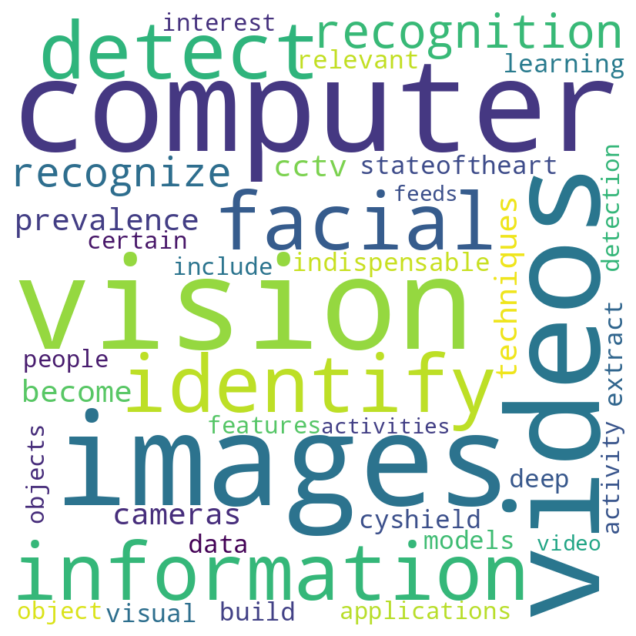

File Name: Cyshield Big Data.txt
Content: big data with an everincreasing amount of data being created every day specialized big data platforms pipelines and analysis technique are required to handle storage and analysis of such immense volumes of data cyshield big data services to efficiently acquire transform and analyze data our data scientists and engineers will help you make sense out of big data and provide you with valuable insights that can transform your business



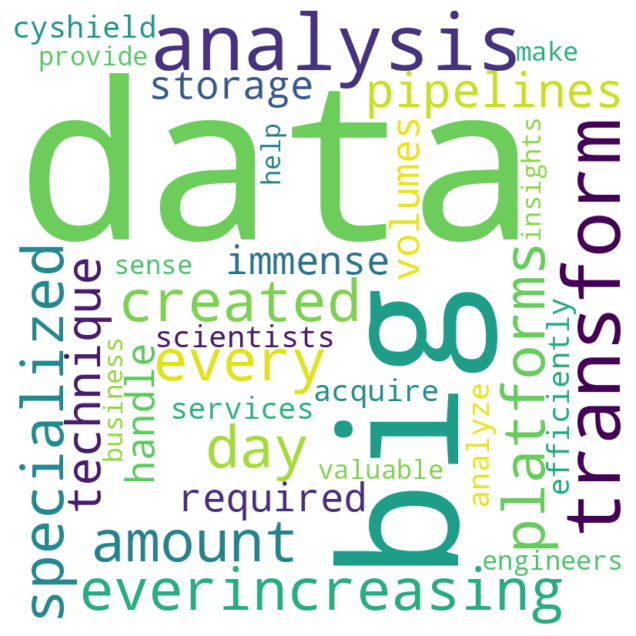

File Name: Cyshield Statistical Modelling and Analysis.txt
Content: statistical modelling and analysis at cyshield ai is not just a buzzword for us we know exactly how to realize the full potential of ai to support your business our data scientists will quickly build and finetune predictive analytics solutions to provide you with actionable insights to take your business to the next level we will gladly take care of all the complicated infrastructure required to build and maintain ai models so that you can focus on what matters



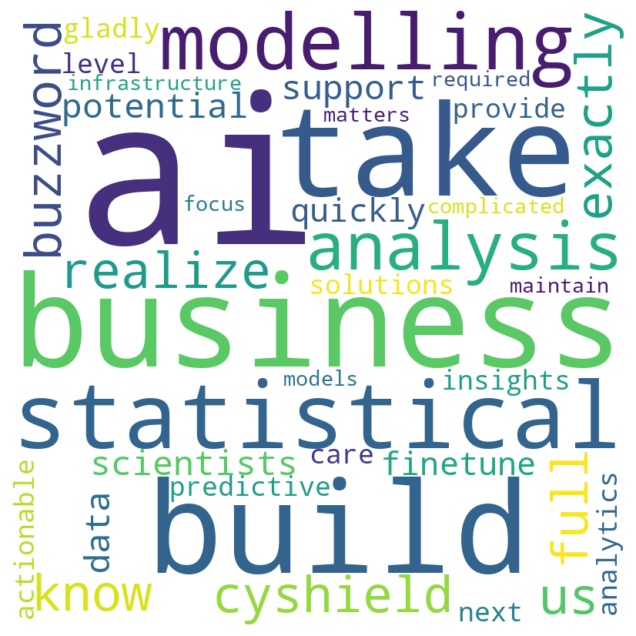

File Name: Cyshield state-of-the-art solutions in NLP .txt
Content: natural language processing natural language processing nlp is one of the hottest topics in ai right now and rightly so since it allows aienabled products to understand people and interact with them cyshield offers stateoftheart nlp solutions in various languages for the following applications chatbots deploy automated chatbot that can understand your users and respond to them in a natural way machine translation translate from any language to any other language on the fly sentiment analysis understand how your users feel so that you can cater to their taste better text summarization and keywork extraction understand the gist of what your users are saying immediately without having to read through everything yourself



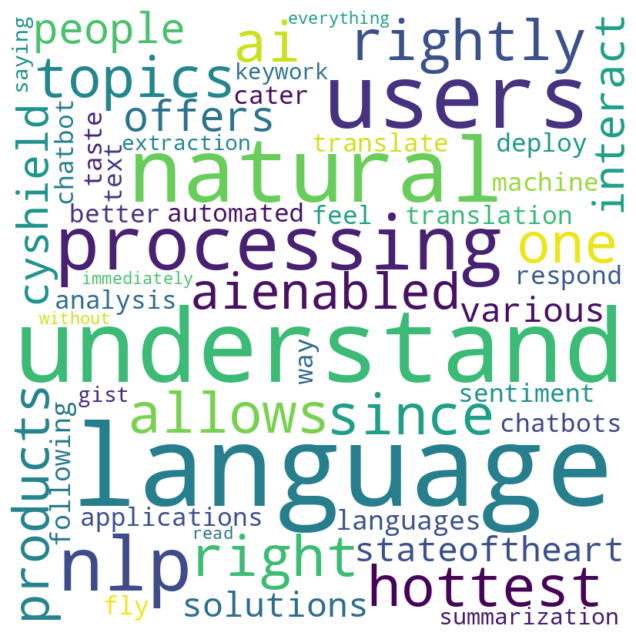

File Name: Cyshield solutions in OCR .txt
Content: ocr and document digitization digitization of document archives is an important step in the digital transformation of modern organizations cyshield offers optical character recognition ocr solutions for various languages to transform your documents into digital format our ocr solutions can handle noisy scans with integrated image preprocessing our system can clean up noisy and old documents to get accurate results complex fonts and scripts even if documents are written in a complex font our system will be finetuned to get the best results for your documents sentiment analysis understand how your users feel so that you can cater to their taste better complex layouts no matter how your documents are laid out our system will read every line and preserve the layout multiple languages our system will read documents in almost any language even bilingual documents ambiguous text our system will resolve ambiguous text and typos in your documen

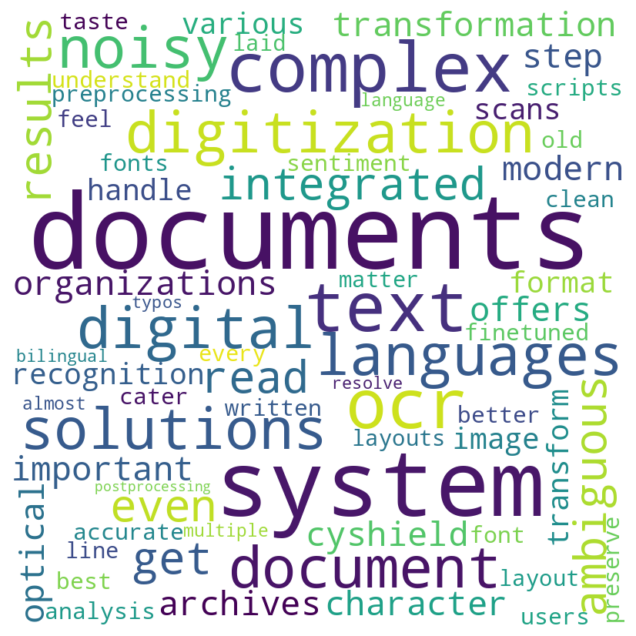

In [28]:
stopwords_set = set(stopwords.words('english'))

# Loop through file data
for index, data in enumerate(file_data):
    print(f"File Name: {data['file_name']}")
    print(f"Content: {data['content']}\n")

    # Tokenize and filter keywords
    words = word_tokenize(data['content'])
    filtered_words = [word for word in words if word.isalnum() and word not in stopwords_set]
    keyword_counter = Counter(filtered_words)

    # Generate and display word cloud
    wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(keyword_counter)
    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()